In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
##features, merged_df, names, locations
run clean_data.py

In [3]:
merged_df

,Name,Difficulty,Distance,Elevation Gain,Route Type,hiking,views,nature trips,walking,birding,...,skiing,historic site,cave,city walk,paddle sports,hot springs,rails trails,beach,location,stars
0,Emerald Lake Trail,MODERATE,3.1 miles,708 feet,Out & Back,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Rocky Mountain National Park,4.7
1,Royal Arch Trail,HARD,3.0 miles,"1,377 feet",Out & Back,1,1,1,1,0,...,0,0,0,0,0,0,0,0,Boulder Open Space,4.6
2,Beaver Brook and Chavez Trail Loop,MODERATE,5.1 miles,"1,105 feet",Loop,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Genesee Park,4.4
3,Hanging Lake Trail,MODERATE,2.8 miles,"1,204 feet",Out & Back,1,1,1,1,1,...,0,0,1,0,0,0,0,0,White River National Forest,4.8
4,Maxwell Falls Lower Trail,MODERATE,4.2 miles,875 feet,Loop,1,1,0,0,0,...,0,0,0,0,0,0,0,0,Arapaho National Forest,4.1
5,Sky Pond via Glacier Gorge Trail,HARD,8.1 miles,"1,765 feet",Out & Back,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Rocky Mountain National Park,4.9
6,Mount Sanitas and Sanitas Valley Loop Trail,MODERATE,3.2 miles,"1,256 feet",Loop,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Boulder Open Space,4.3
7,Mount Bierstadt Trail,HARD,6.9 miles,"2,729 feet",Out & Back,1,1,1,1,1,...,1,0,0,0,0,0,0,0,Mount Evans Wilderness,4.6
8,Gem Lake Trail,MODERATE,3.1 miles,990 feet,Out & Back,1,1,1,1,0,...,0,0,0,0,0,0,0,0,Rocky Mountain National Park,4.4
9,Saint Mary's Glacier,EASY,1.9 miles,807 feet,Out & Back,1,1,1,1,0,...,0,0,0,0,0,0,0,0,Arapaho National Forest,4.5


In [4]:
plt.rcParams['patch.force_edgecolor'] = True

In [19]:
t = merged_df.groupby(['Difficulty'])['Difficulty'].count()

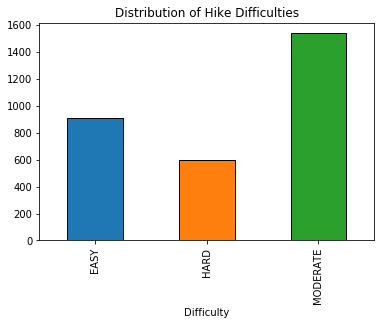

In [21]:
t.plot(kind = 'bar', title = 'Distribution of Hike Difficulties')

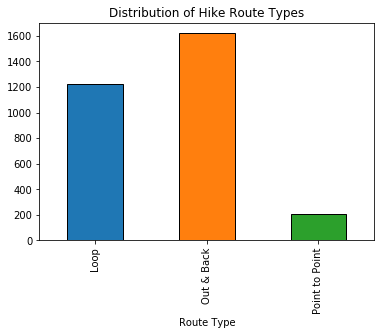

In [55]:
t = merged_df.groupby(['Route Type'])['Route Type'].count()
t.plot(kind = 'bar', title = 'Distribution of Hike Route Types')

In [76]:
t = merged_df.groupby(['location'])['location'].count()
t_sort = t.sort_values(ascending = False)
top_10 = t_sort[:10]
labels = top_10.index

([<matplotlib.axis.XTick at 0x119f936d8>,
 <a list of 10 Text xticklabel objects>)

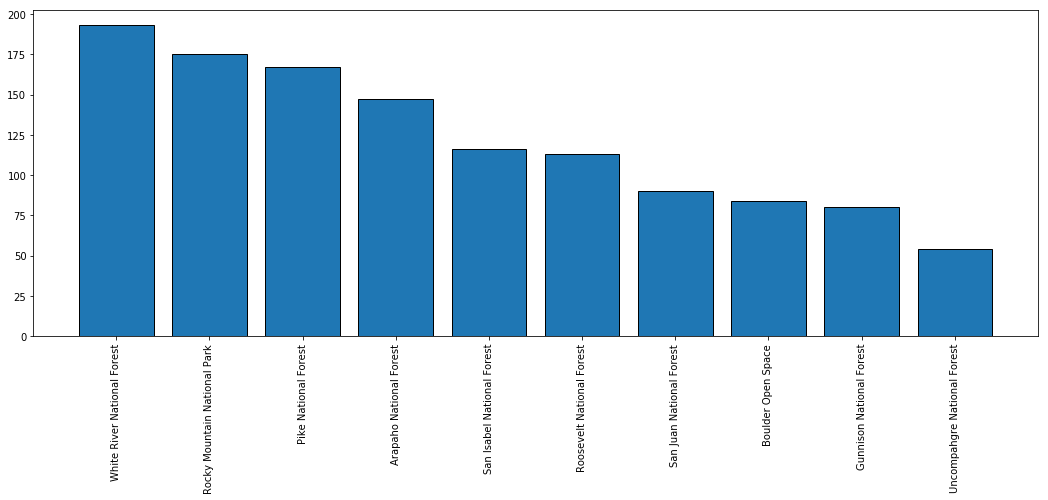

In [80]:
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111)
ax.grid(False)

ax.bar(range(10), top_10, tick_label = labels)
x = range(len(labels))
plt.xticks(x,  labels, rotation = 'vertical')

In [ ]:
# features['Distance'].describe()

In [25]:
features[features['Distance'] == 1134.1]

,Distance,elevation_gain,hiking,views,nature trips,walking,birding,wild flowers,forest,wildlife,...,historic site,cave,city walk,paddle sports,hot springs,rails trails,beach,stars,difficulty,route
2727,1134.1,16243,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4.2,0,2


In [34]:
features[features['Distance'] == 234.1]

,Distance,elevation_gain,hiking,views,nature trips,walking,birding,wild flowers,forest,wildlife,...,historic site,cave,city walk,paddle sports,hot springs,rails trails,beach,stars,difficulty,route
1991,234.1,44124,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0.0,2,2


In [35]:
names[1991]

'Colorado Trail: Denver to Salida'

In [36]:
features = features.drop(features[features['Distance'] == 234.1].index)

In [37]:
features['Distance'].describe()

count    3048.000000
mean        7.700787
std         9.635757
min         0.000000
25%         2.900000
50%         5.700000
75%         9.800000
max       230.600000
Name: Distance, dtype: float64

Text(0.5,1,'Hike Distance Distribution')

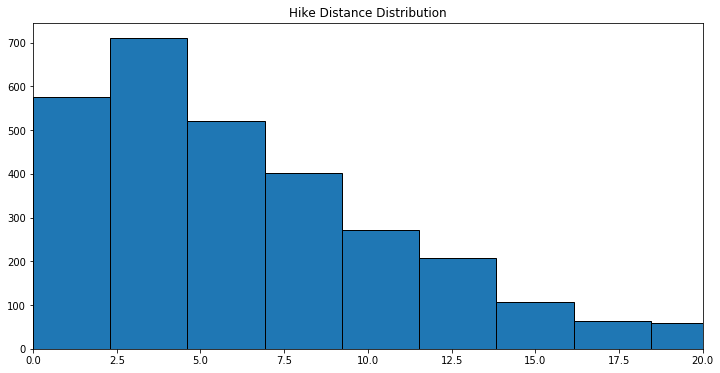

In [53]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
ax.grid(False)
ax.hist(features['Distance'], bins = 100)
ax.set_xlim(0,20)
ax.set_title('Hike Distance Distribution')

In [54]:
# features.sort_values(by = ['Distance'], ascending = False)